<a href="https://colab.research.google.com/github/AyushSrivastava27/Facial-Emotion-Recognition/blob/main/Facial_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayush7232","key":"20952f7e56c6325521d9600d800b9a72"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d 'tapakah68/facial-emotion-recognition'

100% 432M/433M [00:06<00:00, 92.5MB/s]
100% 433M/433M [00:06<00:00, 71.3MB/s]


In [ ]:
!unzip facial-emotion-recognition.zip -d facial-emotion-recognition

Archive:  facial-emotion-recognition.zip
  inflating: facial-emotion-recognition/emotions.csv  
  inflating: facial-emotion-recognition/images/0/Anger.jpg  
  inflating: facial-emotion-recognition/images/0/Contempt.jpg  
  inflating: facial-emotion-recognition/images/0/Disgust.jpg  
  inflating: facial-emotion-recognition/images/0/Fear.jpg  
  inflating: facial-emotion-recognition/images/0/Happy.jpg  
  inflating: facial-emotion-recognition/images/0/Neutral.jpg  
  inflating: facial-emotion-recognition/images/0/Sad.jpg  
  inflating: facial-emotion-recognition/images/0/Surprised.jpg  
  inflating: facial-emotion-recognition/images/1/Anger.jpg  
  inflating: facial-emotion-recognition/images/1/Contempt.jpg  
  inflating: facial-emotion-recognition/images/1/Disgust.jpg  
  inflating: facial-emotion-recognition/images/1/Fear.jpg  
  inflating: facial-emotion-recognition/images/1/Happy.jpg  
  inflating: facial-emotion-recognition/images/1/Neutral.jpg  
  inflating: facial-emotion-recognit

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import  matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import seaborn as sns

In [ ]:
os.listdir('facial-emotion-recognition/images/7')

['Disgust.jpg',
 'Anger.jpg',
 'Contempt.jpg',
 'Neutral.jpg',
 'Sad.jpg',
 'Fear.jpg',
 'Happy.jpg',
 'Surprised.jpg']

In [ ]:
emotions = ['Disgust',
 'Anger',
 'Sad',
 'Surprised',
 'Neutral',
 'Happy',
 'Fear',
 'Contempt']

In [ ]:
BASE_URL = 'facial-emotion-recognition/'

In [ ]:
df = pd.read_csv(BASE_URL +'emotions.csv')

In [ ]:
df.head()

,set_id,gender,age,country
0,0,FEMALE,36,RU
1,1,FEMALE,37,RU
2,2,FEMALE,36,RU
3,3,MALE,29,RU
4,4,FEMALE,43,RU


In [ ]:
new_df = pd.DataFrame({'img':[],'emotion':[],'pixel':[]})

In [ ]:
count =0
for a,i in enumerate(df.values):


    for j,e in enumerate(emotions):

        new_df.loc[count]=['facial-emotion-recognition/images/'+str(i[0])+'/'+e+'.jpg',e,None]
        count=count+1


In [ ]:
new_df.head()

,img,emotion,pixel
0,facial-emotion-recognition/images/0/Disgust.jpg,Disgust,None
1,facial-emotion-recognition/images/0/Anger.jpg,Anger,None
2,facial-emotion-recognition/images/0/Sad.jpg,Sad,None
3,facial-emotion-recognition/images/0/Surprised.jpg,Surprised,None
4,facial-emotion-recognition/images/0/Neutral.jpg,Neutral,None


In [ ]:
import pandas as pd
import cv2
from PIL import Image
import numpy as np

# Assuming new_df is a DataFrame containing image paths and emotions

# Create an empty list to store processed image arrays and update DataFrame later
processed_images = []

for a, i in enumerate(new_df.values):
    img = cv2.imread(i[0], 0)
    if img is not None:  # Check if the image is loaded successfully
        img_blur = cv2.GaussianBlur(img, (7, 7), 0)
        image = Image.fromarray(img_blur)
        image = image.resize((256, 256))
        # Convert image to numpy array
        img_array = np.array(image)
        # Append processed image array to the list
        processed_images.append(img_array)
    else:
        print(f"Error: Unable to load image at index {a}")

# Update the DataFrame with the processed image arrays
new_df['processed_img'] = processed_images


In [ ]:
new_df.head()

,img,emotion,pixel,processed_img
0,facial-emotion-recognition/images/0/Disgust.jpg,Disgust,None,"[[184, 151, 162, 164, 181, 208, 197, 193, 183,..."
1,facial-emotion-recognition/images/0/Anger.jpg,Anger,None,"[[188, 185, 197, 201, 157, 171, 176, 174, 167,..."
2,facial-emotion-recognition/images/0/Sad.jpg,Sad,None,"[[213, 190, 196, 214, 212, 192, 185, 191, 179,..."
3,facial-emotion-recognition/images/0/Surprised.jpg,Surprised,None,"[[209, 209, 209, 209, 209, 208, 209, 210, 209,..."
4,facial-emotion-recognition/images/0/Neutral.jpg,Neutral,None,"[[169, 173, 172, 175, 204, 191, 161, 187, 176,..."


In [ ]:
import numpy as np

# Assuming 'pixel' column contains pixel values of images in new_df DataFrame

# Convert 'pixel' column to a numpy array and handle None values
pixel_array = np.array([np.zeros((256, 256)) if pixel is None else pixel for pixel in new_df['pixel']])

# Convert to float type to allow division
pixel_array = pixel_array.astype(float)

# Normalize pixel values and expand dimensions
image_data = np.expand_dims(pixel_array, axis=-1) / 255.0

# Print the shape to verify
print(image_data.shape)


(152, 256, 256, 1)


In [ ]:
image_data.shape

(152, 256, 256, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
label_to =new_df['emotion'].map({'Disgust':0,'Anger':1,'Sad':2,'Surprised':3,'Neutral':4,'Happy':5,'Fear':6,'Contempt':7}).tolist()
X=np.array(image_data)
y = tf.keras.utils.to_categorical(label_to, num_classes=len(emotions))

In [ ]:
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                                   stratify=y,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense,Input
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    Conv2D(32,(5,5),padding='same',activation='relu',input_shape=( 256, 256, 1)),
    MaxPool2D(),
    Dropout(0.25),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPool2D(strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0,5),
    Dense(8,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
import numpy as np

# Assuming X_train, y_train, X_test, y_test are numpy arrays

# Reshape X_train to have at least four dimensions
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

# Reshape X_test similarly if needed
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Now, try fitting the model again
hist = model.fit(
    X_train, y_train,
    batch_size=6,
    epochs=2,
    validation_data=(X_test, y_test),
    verbose=2
)


Epoch 1/2
19/19 - 7s - loss: 2.0799 - accuracy: 0.0877 - val_loss: 2.0794 - val_accuracy: 0.1316 - 7s/epoch - 388ms/step
Epoch 2/2
19/19 - 1s - loss: 2.0797 - accuracy: 0.1053 - val_loss: 2.0795 - val_accuracy: 0.1053 - 559ms/epoch - 29ms/step


In [ ]:
y_true = model.predict(X_test)

2/2 [==============================] - 1s 10ms/step


In [ ]:
y_true = np.argmax(y_test,axis = 1)
confusion_mtx =tf.math.confusion_matrix(labels=y_true,predictions=y_true)

In [ ]:
loss = pd.DataFrame(hist.history)

<Axes: >

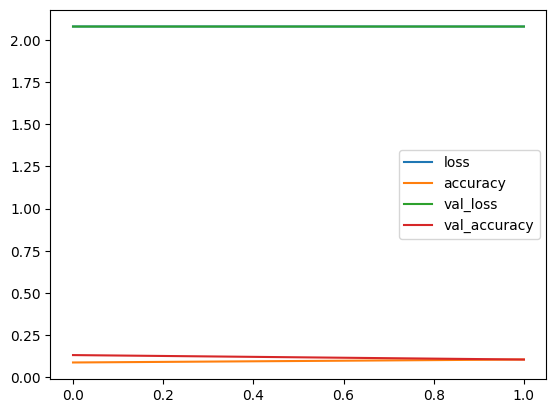

In [ ]:
loss.plot()

<Axes: >

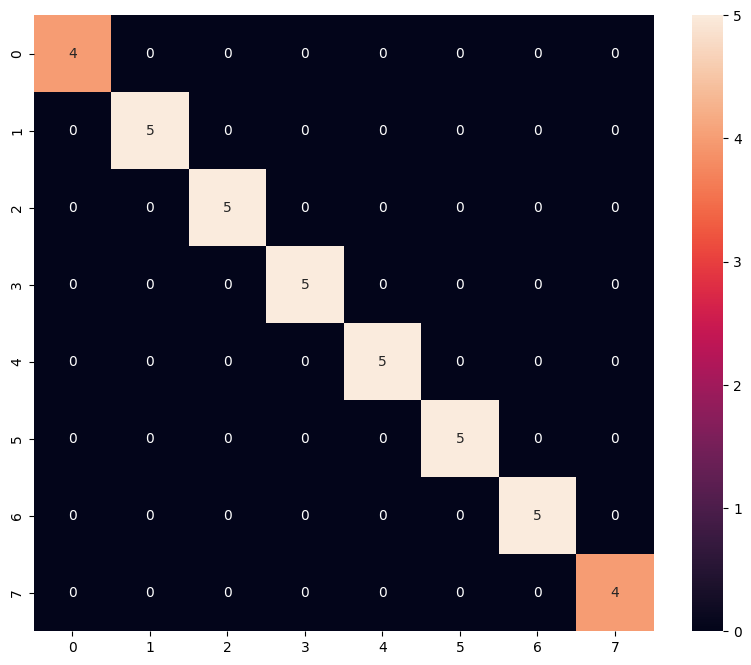

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')